# Filter 
### Correlation and variance Threshold


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [5]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

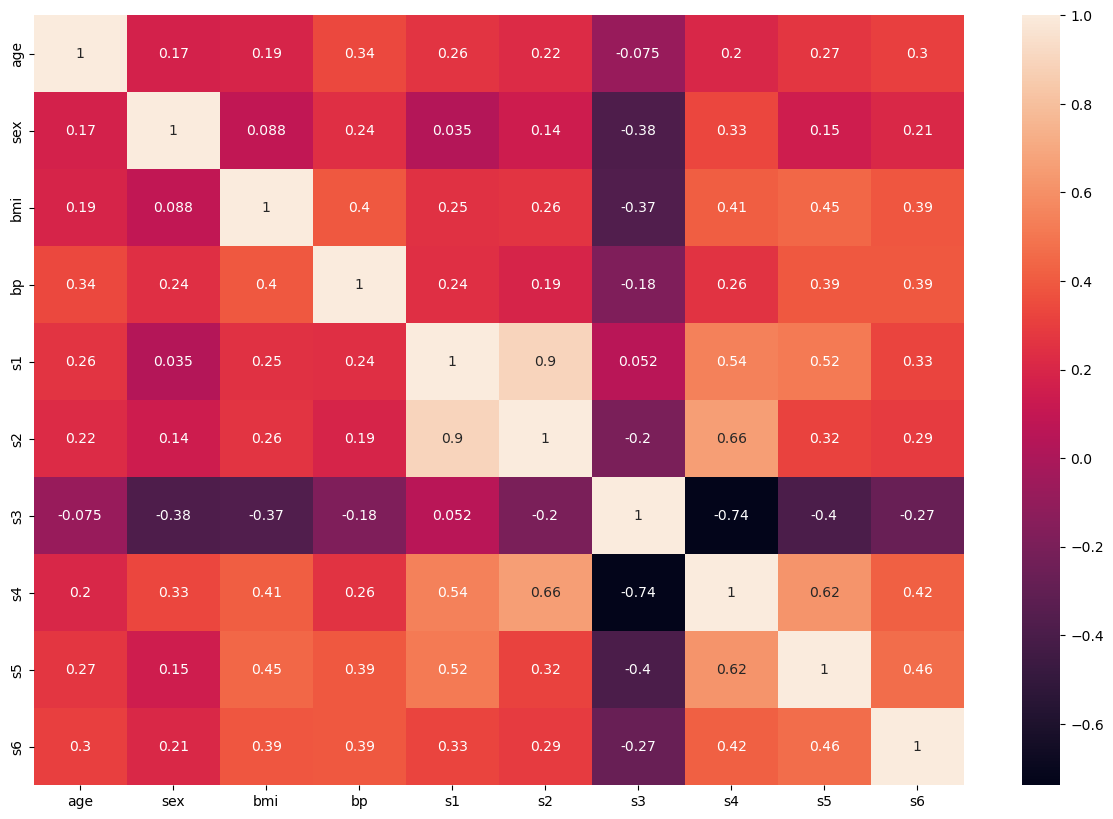

In [7]:
correlation=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)

In [8]:
# variance threshold
from sklearn.feature_selection import VarianceThreshold
df['new']=0
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,new
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,0


In [9]:
varThresh=VarianceThreshold(threshold=0.0)
varThresh.fit(df)
varThresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [12]:
# chi-square 

In [18]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
import numpy as  np

iris=load_iris()
x=iris.data
y=iris.target
x=x.astype(int)
chi_selector=SelectKBest(chi2,k=2)
kBest=chi_selector.fit_transform(x,y)
 
chi_square=pd.DataFrame(list(zip(iris.feature_names,chi_selector.scores_)),columns=['s1','s2'])
chi_square

,s1,s2
0,sepal length (cm),10.287129
1,sepal width (cm),5.022670
2,petal length (cm),133.068548
3,petal width (cm),74.279070


In [16]:
print('number of original features:', x.shape[1])
print('number of reduced features:', kBest.shape[1])

number of original features: 4
number of reduced features: 2


In [20]:
np.asarray(iris.feature_names)[chi_selector.get_support()]

array(['petal length (cm)', 'petal width (cm)'], dtype='<U17')